In [8]:
from PIL import Image, ImageDraw
import glob
import os

# The initial release contains only one tile, so lets hardcode its location
# here.  When you have more tiles, you can update this
TILE_X = 7680
TILE_Y = 10240

# The expected value of a Pixel in a mask file indicating that the pixel is
# within that region.  Tuple value, (Red, Green, Blue, Alpha)
IS_IN_MASK_PIXEL_VALUE = (0, 0, 0, 255,)

# Tile width / height in pixels
TILE_WIDTH_PX = 512
TILE_HEIGHT_PX = 512

# Get the physical path to the PNG image containing the mask file
def get_mask_path(tile_x, tile_y, mask_type):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    return path


# Open an image file and get all the pixels
def get_tile_pixels(tile_path):
    img = Image.open(tile_path)
    pixels = img.load()
    return pixels


# Get the pixels for an image file
def get_mask_pixels(tile_x, tile_y, mask_type):
    mask_path = get_mask_path(tile_x, tile_y, mask_type)
    return get_tile_pixels(mask_path)


def is_in_mask(mask_pixels, pixel_x, pixel_y):
    if mask_pixels[pixel_y, pixel_x] == IS_IN_MASK_PIXEL_VALUE:
        return True
    else:
        return False


def print_ascii_mask(tile_x, tile_y, mask_type):
    mask_pixels = get_mask_pixels(tile_x, tile_y, mask_type)

    # We don't really want to display ASCII art that is 512 characters long as it will be
    # too long to show in a terminal, so lets scale it
    scale_factor = 10

    width_in_chars = int(TILE_WIDTH_PX / scale_factor)
    height_in_chars = int(TILE_HEIGHT_PX / scale_factor)

    for x_char in range(0, width_in_chars - 1):
        for y_char in range(0, height_in_chars - 1):
            # Convert the character index back to actual pixels
            pixel_x = x_char * scale_factor
            pixel_y = y_char * scale_factor

            # is the pixel in my mask?
            in_mask = is_in_mask(mask_pixels, pixel_x, pixel_y)
            if in_mask:
                print("X", end="")
            else:
                print(" ", end="")

        # Print a newline at the end of each row
        print("\n", end="")


# Get a list of all the image tiles for a specific x,y coordinate
# for the specified band
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/timeseries/{tile_x}-{tile_y}-{band}*.png"
    images = glob.glob(path)
    return images


# Print out an ascii representation of the sugarcane regions
print_ascii_mask(TILE_X, TILE_Y, "sugarcane-region")




X XXXXXXXXXXXXX  XXXXXXXXX                       X
 XXXXXXXXXXXXXXXX XXXXXXXXX                       
XXXXXXXXXXXXXXXXXXXXXXXXXXX                       
X    XXXXXXXXXXXXXXXXXXXXXX                      X
XXXX  XXXXXXXXXXXXXXXXXXXXX      X               X
 XXX X XXXXXXXXXXXXXXXXXXXXX    XX               X
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XXXX               
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XXXXXX             
XXXXXX XXXXX XXXXXXXXXXXXXXXXXXXXX   XX           
 XXXXXX  XX    XXXXXXXXXXXXXXXXXXX X  XXXX X      
  XXXXXX  XXXX   XXXXXXX   XXXXXXXXXXXXXXXXXX     
      XXX  XXXXXXXXX       XXXXXXXXXXXXXX         
   XXXX XX  XXXXXXXXX      XXXXXXXXXXXXXX         
       XXXXX XXXXXXXX      XXXXXXXXXXXXXX        X
XX      XXXXXXXXXXXXX  XX  XXXXXXXXXXXXXX    X    
XXXXXXXXX  XXXXXXXXXXXXXXXX XXXXXXXXXXXXXX  XX    
XXXXXXXXXXX      XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX  
 XXXXXXXXXXX      XXXXXXXXXXXXXXXXXXXXXXXXXXX XXX 
XXXXXXXXXXXXX    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XX
XXXXXXXXXXXXX X XXXXXXXXXXXXXXX

In [3]:
from PIL import Image, ImageDraw
import glob
import os

In [28]:
path = f"./data/sentinel-2a-tile-7680x-10240y/timeseries/7680-10240-TCI-2019-08-09.png"
Sampleimage = Image.open(path)

In [40]:
print(Sampleimage.format, Sampleimage.size, Sampleimage.mode)

PNG (512, 512) RGB


In [36]:

bw = Sampleimage.convert('1') 

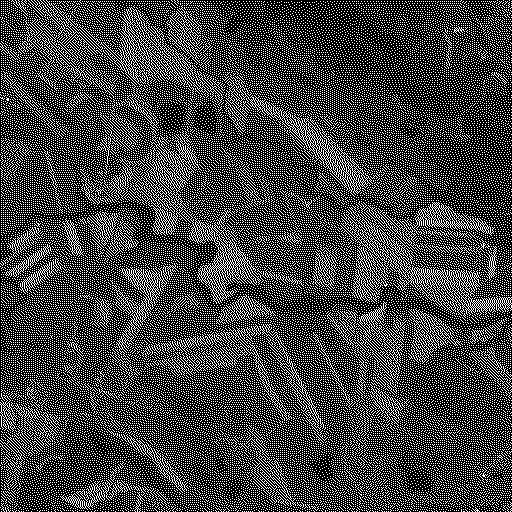

In [37]:
bw